In [107]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import os

TRATAMENTO DOS DADOS

In [108]:
lista_excel = os.listdir('Excel') #PEGANDO A LISTA DE ARQUIVOS DENTRO DA PASTA EXCEL
lista_excel 

['Pesquisa de mercado - Copia.xlsx', 'Pesquisa de mercado.xlsx']

In [109]:
df_inicial = pd.read_excel(f'Excel/{lista_excel[0]}') #LENDO O PRIMEIRO ARQUIVO DA LISTA
lista_colunas = list(df_inicial.columns) #PEGANDO A LISTA DE COLUNAS DO PRIMEIRO ARQUIVO
df_consolidado = pd.DataFrame(columns=lista_colunas) #CRIANDO UM DATAFRAME VAZIO COM AS COLUNAS DO PRIMEIRO ARQUIVO
df_consolidado.columns = df_consolidado.columns.str.strip().str.upper() #PADRONIZANDO AS COLUNAS

In [110]:
for excel in lista_excel: #PERCORRENDO A LISTA DE ARQUIVOS EXCEL
    if excel.endswith('.xlsx'): #VERIFICANDO SE O ARQUIVO TERMINA COM .XLSX
        df = pd.read_excel(f'Excel/{excel}') #LENDO O ARQUIVO
        df.columns = df.columns.str.strip().str.upper() #PADRONIZANDO AS COLUNAS
        df_consolidado = pd.merge(df_consolidado, df, how='outer') #CONCATENANDO OS ARQUIVOS

In [111]:
for coluna in df_consolidado.columns: #PERCORRENDO AS COLUNAS DO DATAFRAME
    df_consolidado[coluna] = df_consolidado[coluna].astype(str).str.upper().str.strip() #PADRONIZANDO OS DADOS

df_consolidado['SÁLARIO'] = df_consolidado['SÁLARIO'].astype(float) #CONVERTENDO A COLUNA SALARIO PARA FLOAT

ANÁLISE EXPLORATÓRIA

In [112]:
df_consolidado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CARGO          13 non-null     object 
 1   HARD SKILLS    13 non-null     object 
 2   SOFT SKILLS    13 non-null     object 
 3   SÁLARIO        13 non-null     float64
 4   LOCALIZAÇÃO    13 non-null     object 
 5   SENERIORIDADE  13 non-null     object 
 6   FONTE          13 non-null     object 
dtypes: float64(1), object(6)
memory usage: 860.0+ bytes


In [113]:
df_consolidado.describe()

,SÁLARIO
count,13.000000
mean,6423.076923
std,3213.553030
min,3000.000000
25%,4000.000000
50%,6000.000000
75%,8000.000000
max,12000.000000


ANÁLISE DESCRITIVA

DESVIO PADRÃO SALARIAL POR CARGO E SENIORIDADE


,CARGO,SENERIORIDADE,SÁLARIO
1,DESENVOLVEDOR,PLENO,"R$ 2,701.85"
2,DESENVOLVEDOR,SENIOR,"R$ 1,414.21"
0,DESENVOLVEDOR,JUNIOR,"R$ 1,114.30"


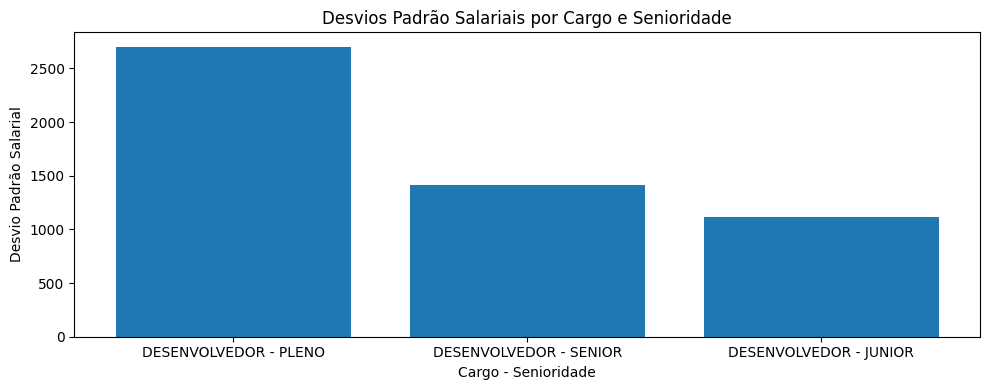

In [142]:
desvio_salarial = df_consolidado.groupby(['CARGO', 'SENERIORIDADE'])['SÁLARIO'].std().reset_index() # Calculando o desvio padrão salarial por cargo e senioridade
desvio_salarial = desvio_salarial.sort_values(by='SÁLARIO', ascending=False)  # Ordenando o desvio padrão salarial
desvio_salarial_graf = desvio_salarial.sort_values(by='SÁLARIO', ascending=False)  # Ordenando o desvio padrão salarial para gráfico  
desvio_salarial['SÁLARIO'] = desvio_salarial['SÁLARIO'].map('R$ {:,.2f}'.format) # Formatando a coluna salarial
print('DESVIO PADRÃO SALARIAL POR CARGO E SENIORIDADE')
display(desvio_salarial)  # Mostrando o desvio padrão salarial

# Gráfico
plt.figure(figsize=(10,4))
plt.bar(desvio_salarial_graf['CARGO'] + ' - ' + desvio_salarial_graf['SENERIORIDADE'],desvio_salarial_graf['SÁLARIO'])
plt.title('Desvios Padrão Salariais por Cargo e Senioridade')
plt.ylabel('Desvio Padrão Salarial')
plt.xlabel('Cargo - Senioridade')
plt.tight_layout()
plt.show()

MÉDIA SALARIAL POR CARGO E SENIORIDADE


,CARGO,SENERIORIDADE,SÁLARIO
2,DESENVOLVEDOR,SENIOR,"R$ 11,000.00"
1,DESENVOLVEDOR,PLENO,"R$ 7,600.00"
0,DESENVOLVEDOR,JUNIOR,"R$ 3,916.67"


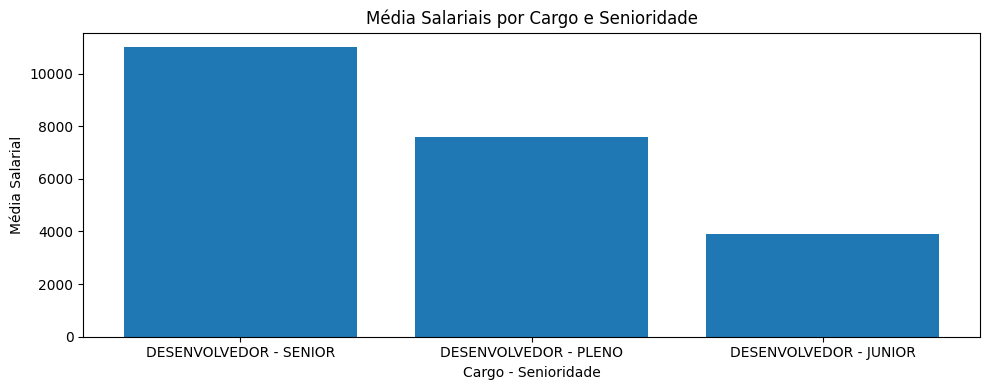

In [145]:
media_salarial = df_consolidado.groupby(['CARGO', 'SENERIORIDADE'])['SÁLARIO'].mean().reset_index() #AGRUPANDO A MÉDIA SALARIAL POR CARGO E SENIORIDADE
media_salarial = media_salarial.sort_values(by='SÁLARIO', ascending=False) #ORDENANDO A MÉDIA SALARIAL
media_salarial_graf = media_salarial.sort_values(by='SÁLARIO', ascending=False) #ORDENANDO A MÉDIA SALARIAL PARA GRÁFICO
media_salarial['SÁLARIO'] = media_salarial['SÁLARIO'].map('R$ {:,.2f}'.format) #FORMATANDO A COLUNA SALARIO
print('MÉDIA SALARIAL POR CARGO E SENIORIDADE')
display(media_salarial) #MOSTRANDO A MÉDIA SALARIAL

# Gráfico
plt.figure(figsize=(10,4))
plt.bar(media_salarial_graf['CARGO'] + ' - ' + media_salarial_graf['SENERIORIDADE'], media_salarial_graf['SÁLARIO'])
plt.title('Média Salariais por Cargo e Senioridade')
plt.ylabel('Média Salarial')
plt.xlabel('Cargo - Senioridade')
plt.tight_layout()
plt.show()


TOP 10 HARD SKILLS MAIS REQUISITADAS


,HARD SKILLS,COUNT
0,REACT,7
1,SQL,7
2,PYTHON,6
3,GIT,5
4,ANGULAR,5
5,CSS,5
6,HTML,5
7,JAVASCRIPT,4
8,JAVA,3
9,DOCKER,3


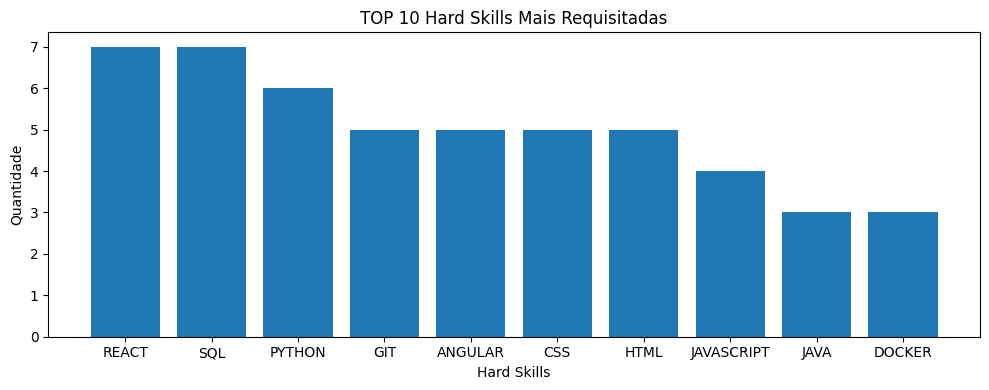

In [148]:
hard_skills = df_consolidado['HARD SKILLS'].str.get_dummies(sep=', ') #SEPARANDO AS HARD SKILLS
hard_skills = hard_skills.sum().sort_values(ascending=False).reset_index() #SOMANDO AS HARD SKILLS E ORDENANDO
hard_skills.columns = ['HARD SKILLS', 'COUNT'] #RENOMEANDO AS COLUNAS
print('TOP 10 HARD SKILLS MAIS REQUISITADAS')
display(hard_skills.head(10)) #MOSTRANDO AS HARD SKILLS

# Gráfico
plt.figure(figsize=(10,4))
plt.bar(hard_skills['HARD SKILLS'].head(10), hard_skills['COUNT'].head(10))
plt.title('TOP 10 Hard Skills Mais Requisitadas')
plt.ylabel('Quantidade')
plt.xlabel('Hard Skills')
plt.tight_layout()
plt.show()

TOP 10 SOFT SKILLS MAIS REQUISITADAS


,SOFT SKILLS,COUNT
0,TRABALHO EM EQUIPE,10
1,COMUNICAÇÃO,8
2,ATENÇÃO AOS DETALHES,5
3,PROATIVIDADE,3
4,CRIATIVIDADE,3
5,ANÁLITICO,3
6,PROATIVO,2
7,VONTADE DE APRENDER,2
8,LIDERANÇA,2
9,ANALÍTICO,2


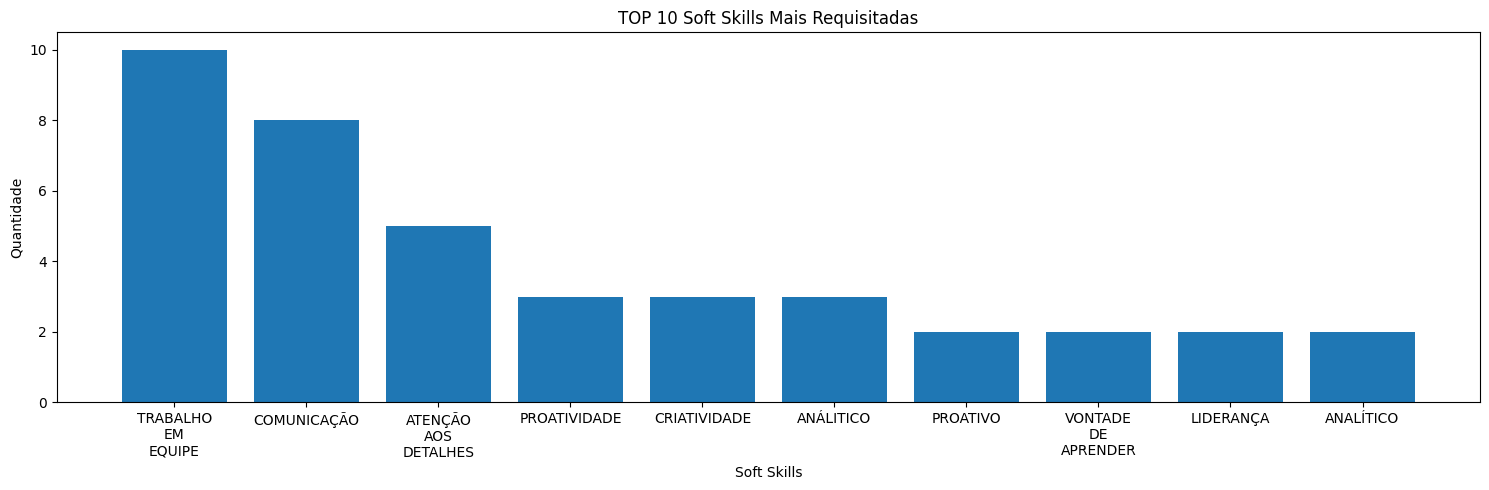

In [152]:
soft_skills = df_consolidado['SOFT SKILLS'].str.get_dummies(sep=', ') #SEPARANDO AS SOFT SKILLS
soft_skills = soft_skills.sum().sort_values(ascending=False).reset_index() #SOMANDO AS SOFT SKILLS E ORDENANDO
soft_skills.columns = ['SOFT SKILLS', 'COUNT'] #RENOMEANDO AS COLUNAS
print('TOP 10 SOFT SKILLS MAIS REQUISITADAS')
display(soft_skills.head(10)) #MOSTRANDO AS SOFT SKILLS

# Gráfico
plt.figure(figsize=(15,5))
labels = [skill.replace(' ', '\n') for skill in soft_skills['SOFT SKILLS'].head(10)]
plt.bar(labels, soft_skills['COUNT'].head(10))
plt.title('TOP 10 Soft Skills Mais Requisitadas')
plt.ylabel('Quantidade')
plt.xlabel('Soft Skills')
plt.tight_layout()
plt.show()

MÉDIA SALARIAL POR HARD SKILL


,HARD SKILL,SALARIO MEDIO
0,.NET,"R$ 12,000.00"
1,.NET CORE,"R$ 12,000.00"
2,.NET MVC,"R$ 12,000.00"
18,GO,"R$ 12,000.00"
34,PWA,"R$ 12,000.00"
12,ENTITY,"R$ 12,000.00"
28,NO-SQL,"R$ 11,000.00"
5,API,"R$ 10,000.00"
8,CI/CD,"R$ 10,000.00"
35,PYAUTOGUI,"R$ 10,000.00"


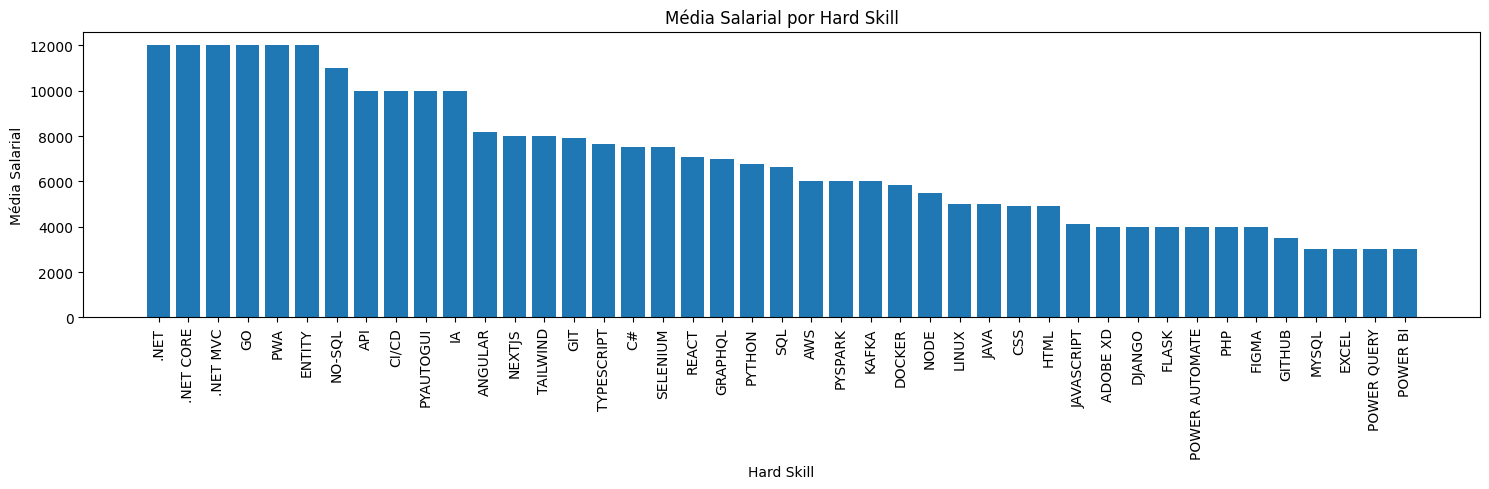

In [154]:
# Separando as hard skills em colunas binárias (0 ou 1)
hard_skills_dummies = df_consolidado['HARD SKILLS'].str.get_dummies(sep=', ')

# Concatenando com o DataFrame original
df_skills = pd.concat([df_consolidado, hard_skills_dummies], axis=1)

# Calculando o salário médio para cada hard skill
media_salario_hard = {} 
for skill in hard_skills_dummies.columns:
    media_salario_hard[skill] = df_skills.loc[df_skills[skill] == 1, 'SÁLARIO'].mean()

# Transformando em DataFrame para visualizar melhor
media_salario_hard = pd.DataFrame(list(media_salario_hard.items()), columns=['HARD SKILL', 'SALARIO MEDIO'])
media_salario_hard = media_salario_hard.sort_values(by='SALARIO MEDIO', ascending=False)
media_salario_hard['SALARIO MEDIO'] = media_salario_hard['SALARIO MEDIO'].map('R$ {:,.2f}'.format)
print('MÉDIA SALARIAL POR HARD SKILL')
display(media_salario_hard)  # Mostrando a média salarial por hard skill

# Gráfico
plt.figure(figsize=(15,5))      
plt.bar(media_salario_hard['HARD SKILL'], media_salario_hard['SALARIO MEDIO'].str.replace('R$ ', '').str.replace(',', '').astype(float))
plt.title('Média Salarial por Hard Skill')  
plt.ylabel('Média Salarial')
plt.xlabel('Hard Skill')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [163]:
# Cria colunas binárias para cada hard skill
hard_skills_dummies = df_consolidado['HARD SKILLS'].str.get_dummies(sep=', ')

# Junta as dummies ao dataframe original
df_skills = pd.concat([df_consolidado[['SENERIORIDADE']], hard_skills_dummies], axis=1)

# Soma as skills por senioridade
skills_por_senioridade = df_skills.groupby('SENERIORIDADE').sum().T

# Para cada senioridade, mostra as 5 skills mais comuns
print('SKILLS MAIS COMUNS POR SENIORIDADE')
print('')
for senioridade in skills_por_senioridade.columns:
    print(f"Skills mais comuns para {senioridade}:")
    display(skills_por_senioridade[senioridade].sort_values(ascending=False).head(5))
    print('-'*30)

SKILLS MAIS COMUNS POR SENIORIDADE

Skills mais comuns para JUNIOR:


CSS           4
HTML          4
JAVASCRIPT    4
SQL           3
REACT         3
Name: JUNIOR, dtype: int64

------------------------------
Skills mais comuns para PLENO:


ANGULAR    3
REACT      3
SQL        3
PYTHON     3
DOCKER     2
Name: PLENO, dtype: int64

------------------------------
Skills mais comuns para SENIOR:


GIT          2
.NET CORE    1
.NET         1
ANGULAR      1
API          1
Name: SENIOR, dtype: int64

------------------------------


In [166]:
soft_skills_dummies = df_consolidado['SOFT SKILLS'].str.get_dummies(sep=', ')
# Para cada linha, pega as skills presentes
combinacoes = []
for idx, row in df_consolidado.iterrows():
    hs = [skill for skill in hard_skills_dummies.columns if hard_skills_dummies.loc[idx, skill] == 1]
    ss = [skill for skill in soft_skills_dummies.columns if soft_skills_dummies.loc[idx, skill] == 1]
    if hs and ss:
        for h in hs:
            for s in ss:
                combinacoes.append((h, s))

# Conta as combinações mais comuns
combinacoes_df = pd.DataFrame(combinacoes, columns=['HARD SKILL', 'SOFT SKILL'])
combinacoes_mais_comuns = combinacoes_df.value_counts().reset_index(name='COUNT')
combinacoes_mais_comuns = combinacoes_mais_comuns.sort_values(by='COUNT', ascending=False)

# Exibe as 10 combinações mais comuns,
print('TOP 20 COMBINAÇÕES MAIS COMUNS DE HARD SKILLS E SOFT SKILLS')
combinacoes_mais_comuns.head(20)

TOP 20 COMBINAÇÕES MAIS COMUNS DE HARD SKILLS E SOFT SKILLS


,HARD SKILL,SOFT SKILL,COUNT
0,SQL,TRABALHO EM EQUIPE,6
1,SQL,COMUNICAÇÃO,5
2,PYTHON,TRABALHO EM EQUIPE,5
3,GIT,TRABALHO EM EQUIPE,4
4,GIT,COMUNICAÇÃO,4
5,REACT,COMUNICAÇÃO,4
6,PYTHON,COMUNICAÇÃO,4
7,REACT,ATENÇÃO AOS DETALHES,4
8,REACT,TRABALHO EM EQUIPE,4
9,ANGULAR,COMUNICAÇÃO,3


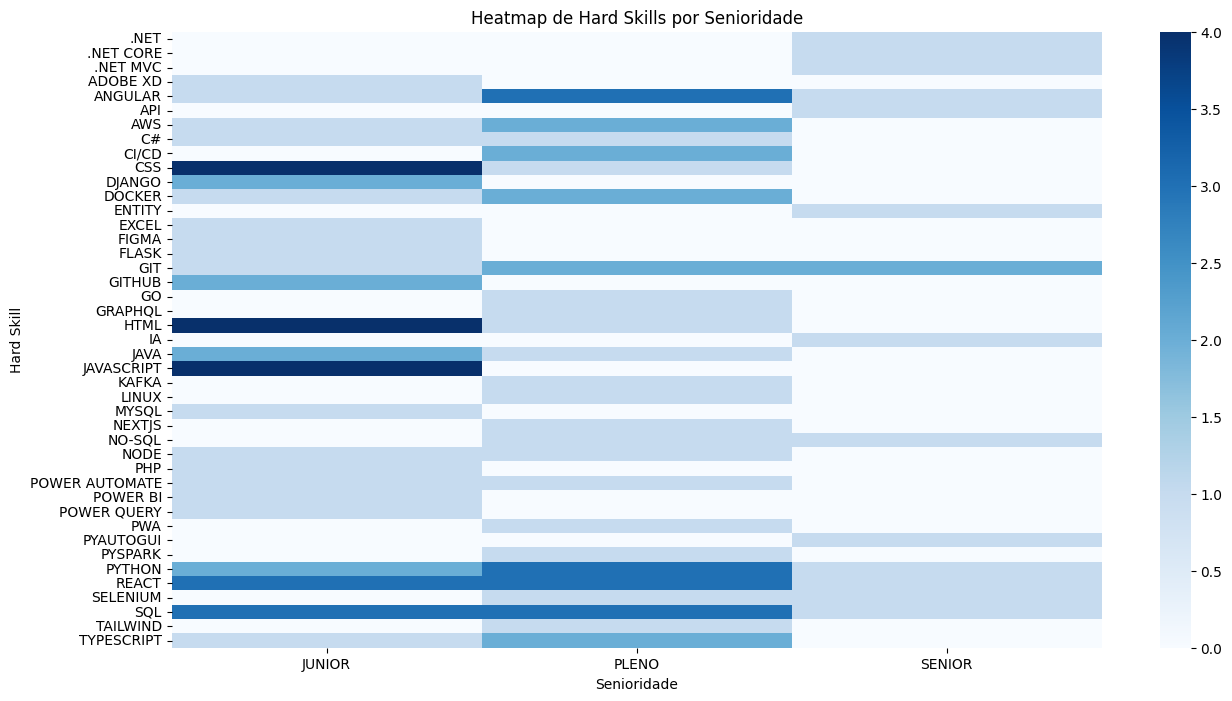

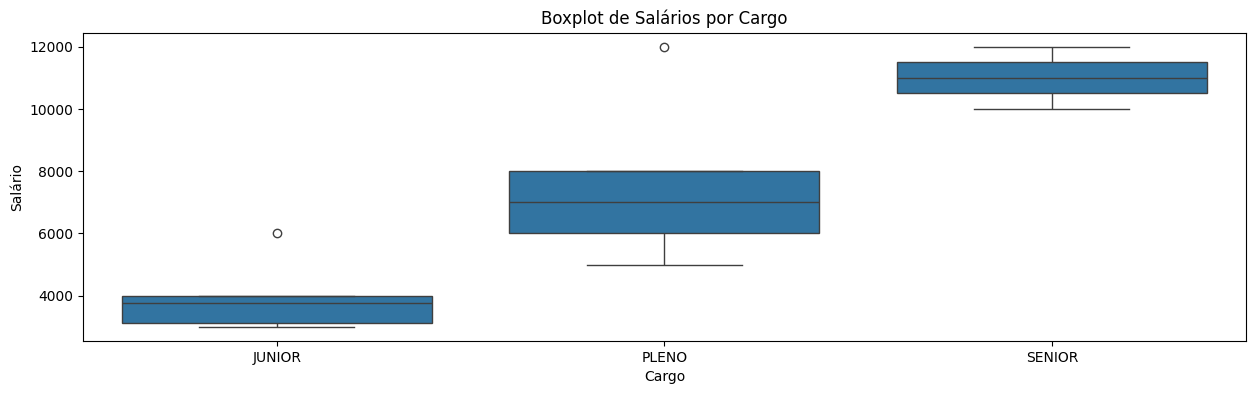

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Heatmap de skills por senioridade
hard_skills_dummies = df_consolidado['HARD SKILLS'].str.get_dummies(sep=', ')
skills_por_senioridade = pd.concat([df_consolidado[['SENERIORIDADE']], hard_skills_dummies], axis=1)
skills_heatmap = skills_por_senioridade.groupby('SENERIORIDADE').sum().T
plt.figure(figsize=(15,8))
sns.heatmap(skills_heatmap, cmap='Blues')
plt.title('Heatmap de Hard Skills por Senioridade')
plt.ylabel('Hard Skill')
plt.xlabel('Senioridade')
plt.show()

# Boxplot de salários por cargo
plt.figure(figsize=(15,4))
sns.boxplot(x='SENERIORIDADE', y='SÁLARIO', data=df_consolidado)
plt.title('Boxplot de Salários por Cargo')
plt.ylabel('Salário')
plt.xlabel('Cargo')
plt.show()